In [ ]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.layers import Activation,Dropout,Dense
from keras.datasets import mnist

In [ ]:
model = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
from keras.models import Sequential
model = Sequential()

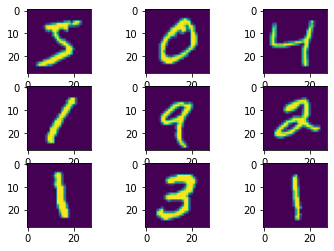

In [ ]:
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_train[i])
plt.show()

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
#đưa toàn bộ giá trị điểm ảnh về khoảng 0 -> 1.
x=x_test
x_train=x_train.reshape(60000,784)
x_test= x_test.reshape(10000,784)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255

In [ ]:
from tensorflow.keras.utils import to_categorical
from keras import metrics
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [ ]:
#tao lop
model.add(Dense(512,activation="relu",input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                5

In [ ]:
from tensorflow.keras.optimizers import RMSprop

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [ ]:
history=model.fit(x_train, y_train, batch_size=128,epochs =100, verbose=1,validation_data=(x_test,y_test))

Epoch 1/100
469/469 [==============================] - 7s 7ms/step - loss: 0.2677 - accuracy: 0.9158 - val_loss: 0.1438 - val_accuracy: 0.9559
Epoch 2/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1135 - accuracy: 0.9667 - val_loss: 0.0834 - val_accuracy: 0.9740
Epoch 3/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0883 - accuracy: 0.9752 - val_loss: 0.0873 - val_accuracy: 0.9738
Epoch 4/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0737 - accuracy: 0.9789 - val_loss: 0.0774 - val_accuracy: 0.9786
Epoch 5/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0655 - accuracy: 0.9816 - val_loss: 0.0883 - val_accuracy: 0.9797
Epoch 6/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0600 - accuracy: 0.9830 - val_loss: 0.0908 - val_accuracy: 0.9794
Epoch 7/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0587 - accuracy: 0.9849 - val_loss: 0.0807 - val_accuracy: 0.9839

In [ ]:
model.save('Mnist.h5')

In [ ]:
from keras.models import load_model
model5 = load_model('Mnist.h5')

In [ ]:
#danh gia mo hinh tren tap test
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.4270 - accuracy: 0.9835


[0.4269900918006897, 0.9835000038146973]

313/313 [==============================] - 1s 4ms/step - loss: 0.4270 - accuracy: 0.9835
Test loss =  0.4269900918006897
Test acuracy 0.9835000038146973


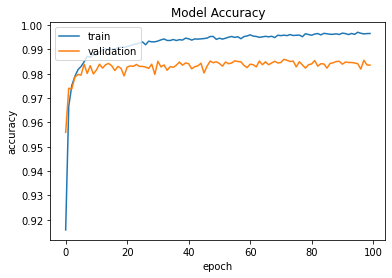

In [ ]:
score=model.evaluate(x_test,y_test,verbose=1)
print('Test loss = ',score[0])
print('Test acuracy',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc ='upper left')

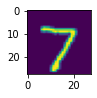

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


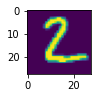

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


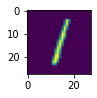

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


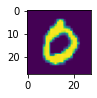

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


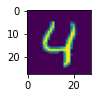

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


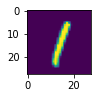

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


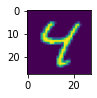

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


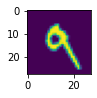

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


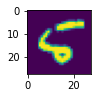

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
import numpy as np
Y_pred = model.predict(x_test)
for i in range(9):
  plt.subplot(330 +i+1)
  plt.imshow(x[i])
  plt.show()
  print(np.round(Y_pred[i]))

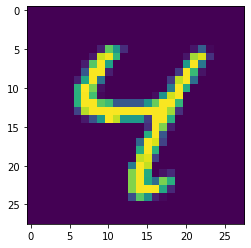

In [ ]:
plt.imshow(x[6])

In [ ]:
#output cua mo hinh co phan phoi xac suat cua cac nhan
predict_result = model.predict(np.array([x_test[6]]))
print(predict_result)

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [ ]:
#nhan co gia tri xac saut cao nhat
np.argmax(predict_result)

4